# 🏗️ Machine Learning–Based Construction Equipment Prediction System  

This project focuses on building a **machine learning model** to predict the required number of construction equipment (cranes, trucks, excavators, etc.) for different projects.  

Key features:
- 📊 **Data preprocessing & cleaning** (dates, weather, equipment numbers, etc.)  
- 🌤️ **Weather-based equipment adjustment** (temperature, humidity, wind speed)  
- 🤖 **Model training & evaluation** for prediction accuracy  
- 🛠️ **Realistic validation** using completed projects  

---

> **Goal:** Improve planning and resource allocation in construction projects using data-driven machine learning.



## 🔹 Step 1: Data Preprocessing  

In this step, we:  
- Clean missing values and drop unnecessary columns  
- Prepare the dataset for further analysis and modeling  


In [ ]:
# This cell is to preview the raw data:

import pandas as pd
from google.colab import files

# Step 1: Upload file
uploaded = files.upload()

# Step 2: Load raw dataset
df = pd.read_excel("Saudi_projects_dataset.xlsx")


print("📌 Preview of RAW dataset:")
df.head()


Saving Saudi_projects_dataset.xlsx to Saudi_projects_dataset.xlsx
📌 Preview of RAW dataset:


,sectors,sector_budgets,sector_num_projects,name_project,type_project,budget_project,startday_project,enddate_project,area_project,region_project,status_project
0,تجاري,1058790791316,902,برج غرفة الشرقية الاستثماري – Asharqia Chamber...,تجاري,3.350000e+08,03-07-2019,31-12-2021,"7,752 متر مربع","المنطقة الشرقية, الدمام",تحت الإنشاء
1,تجاري,1058790791316,902,مقر برايس ووتر هاوس كوبرز – PWC Headquarter ...,"تجاري, سكني",NaN,01-01-2010,NaN,"8,000 متر مربع","منطقة الرياض, الرياض",تحت الإنشاء
2,تجاري,1058790791316,902,مقر المدفوعات السعودية – Saudi Payment Headqua...,"تجاري, سكني",1.178000e+09,01-01-2009,31-12-2014,"19,500 متر مربع","منطقة الرياض, الرياض",مكتمل
3,تجاري,1058790791316,902,الاحساء ستريب مول – Ahsa Strip Mall ...,تجاري,NaN,NaN,NaN,"19,888 متر مربع","المنطقة الشرقية, الأحساء",معلن عنه
4,تجاري,1058790791316,902,برج الدايل – Al-Dailh Tower,"فندقي, تجاري",1.200000e+08,01-06-2019,31-03-2022,"3,651 متر مربع","منطقة مكة المكرمة, جدة",تحت الإنشاء


In [ ]:
# this cell is only to take the raw data and filter it to keep the needed columns
import pandas as pd
from google.colab import files

# Step 1: Upload file
uploaded = files.upload()

# Step 2: Load dataset
df = pd.read_excel("Saudi_projects_dataset.xlsx")

# Step 3: Keep only the required columns
keep_cols = [
    'sectors',
    'type_project',
    'budget_project',
    'area_project',
    'region_project',
    'startday_project',
    'enddate_project',
    'status_project'
]
df = df[keep_cols]

# Step 4: Keep only completed and under construction projects
valid_status = ['مكتمل', 'تحت الإنشاء']
df = df[df['status_project'].isin(valid_status)]

# Step 5: Save cleaned dataset as new Excel file
df.to_excel("projects_filtered.xlsx", index=False)

# Step 6: Download cleaned file back to your computer
files.download("projects_filtered.xlsx")

print("✅ Cleaned dataset saved and downloaded!")


Saving Saudi_projects_dataset.xlsx to Saudi_projects_dataset.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Cleaned dataset saved and downloaded!


In [ ]:
from google.colab import drive
import pandas as pd

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Path to your filtered dataset in Drive
file_path = '/content/drive/MyDrive/grad project/projects_filtered.xlsx'

# 3️⃣ Load the dataset
df = pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
# Check missing values for area and budget columns
missing_area = df['area_project'].isnull().sum()
missing_budget = df['budget_project'].isnull().sum()

print("Missing values in area_project:", missing_area)
print("Missing values in budget_project:", missing_budget)

 # checking number of completed projects:
num_completed = df[df['status_project'] == 'مكتمل'].shape[0]
num_under_construction = df[df['status_project'] == 'تحت الإنشاء'].shape[0]

print("\nCompleted projects:", num_completed)
print("Under-construction projects:", num_under_construction)


Missing values in area_project: 279
Missing values in budget_project: 682

Completed projects: 447
Under-construction projects: 714


In [ ]:
#This cell drops the unwanted columns and cleanses the area column and handles missing values.
import re
#  Drop budget column
df = df.drop(columns=['budget_project'])
#  Robust cleaning function for area_project
unmatched = []

def clean_area(area_str):
    if pd.isna(area_str):
        return None
    area_str = str(area_str).replace(' ', '')  # remove spaces
    area_lower = area_str.lower()

    try:
        # Million square meters
        if 'مليون' in area_lower:
            number = re.findall(r'[\d,.]+', area_str)[0]
            return float(number.replace('.', '').replace(',', '')) * 1_000_000
        # Thousand square meters
        elif 'ألف' in area_lower:
            number = re.findall(r'[\d,.]+', area_str)[0]
            return float(number.replace('.', '').replace(',', '')) * 1_000
        # km²
        elif 'كم' in area_lower:
            number = re.findall(r'[\d,.]+', area_str)[0]
            return float(number.replace('.', '').replace(',', '')) * 1_000_000
        # m²
        elif 'مترمربع' in area_lower or 'م2' in area_lower:
            number = re.findall(r'[\d,.]+', area_str)[0]
            return float(number.replace('.', '').replace(',', ''))
        # acres
        elif 'acre' in area_lower:
            number = re.findall(r'[\d,.]+', area_str)[0]
            return float(number.replace('.', '').replace(',', '')) * 4046.86
        # fallback: try to extract numeric
        else:
            number = re.findall(r'[\d,.]+', area_str)
            if number:
                return float(number[0].replace('.', '').replace(',', ''))
            else:
                unmatched.append(area_str)
                return None
    except:
        unmatched.append(area_str)
        return None

# Apply cleaning function
df['area_project'] = df['area_project'].apply(clean_area)

# Fill missing values with median
df['area_project'] = df['area_project'].fillna(df['area_project'].median())

#  Print unmatched area strings (if any)
if unmatched:
    print("⚠️ Unmatched area strings:", unmatched)


⚠️ Unmatched area strings: ['مختلفة', 'مليونمترمربع', 'مليونيومائتيألفمترمربع']


In [ ]:
#This cell cleanses the region column:
import pandas as pd

# 1. Define a list of primary cities for extraction, built from dataset
primary_cities = [
    'الدمام', 'الرياض', 'جدة', 'الطائف', 'أبها', 'الخبر', 'بيشة', 'بلجرشي',
    'المدينة المنورة', 'الأحساء', 'الجبيل', 'بريدة', 'الدرعية', 'المزاحمية',
    'الرس', 'البكيرية', 'الخرج', 'عنيزة', 'القويعية', 'ضبا', 'الأفلاج', 'أملج',
    'المجمعة', 'الباحة', 'دومة الجندل', 'حفر الباطن', 'جازان', 'العلا', 'الخفجي',
    'عرعر', 'تبوك', 'الظهران', 'رابغ', 'سكاكا', 'الغزالة', 'شقراء', 'ثول',
    'الكامل', 'طبرجل', 'بحرة', 'عفيف', 'خميس مشيط', 'طريف', 'الحناكية',
    'رأس الخير', 'الليث', 'الشقيق',
    # NEW ADDITIONS FROM  DATASET:
    'ينبع',          # From 'ينبع, منطقة المدينة المنورة'
    'القطيف',        # From 'القطيف, المنطقة الشرقية'
    'وادي الدواسر',  # From 'وادي الدواسر, منطقة الرياض'
    'الجموم',        # From longer entries mentioning الجموم
    'البرابر',       # From longer entries mentioning البرابر
    'ثادق',          # Common city that might appear
    'ضرما',          # Common city that might appear
    'الحريق',        # Common city that might appear
    'الزلفي',        # Common city that might appear
    'السليل'         # Common city that might appear
]

# 2. Map special compound entries to their main city
special_city_mapping = {
    'الجبيل الصناعية': 'الجبيل',
    'مدينة الملك عبدالله الاقتصادية': 'جدة',
    'مدينة سدير للصناعة والأعمال': 'المجمعة',
    'وعد الشمال': 'عرعر',
    'رأس الخير': 'الجبيل',
    'منطقة نجران': 'نجران',
    'منطقة الباحة': 'الباحة',
    'منطقة تبوك': 'تبوك',
    'منطقة عسير': 'أبها',
    'منطقة حائل': 'حائل',
    'منطقة جازان': 'جازان',
    'منطقة الرياض': 'الرياض',
    'المنطقة الشرقية': 'الدمام',
    'مكة المكرمة, منطقة مكة المكرمة': 'مكة المكرمة',  # NEW - fixes your main issue
    'منطقة مكة المكرمة': 'مكة المكرمة',                 # NEW - handles other variations
    'ينبع, الأحساء, الجبيل الصناعية, الخرج, الطائف, عنيزة': 'الطائف',  # NEW - picks one major city
    'ينبع, منطقة المدينة المنورة': 'ينبع',              # NEW
    'القطيف, المنطقة الشرقية': 'القطيف',                # NEW
    'مكة المكرمة, الطائف': 'الطائف',                    # NEW
    'وادي الدواسر, منطقة الرياض': 'وادي الدواسر',       # NEW
    'منطقة القصيم, منطقة الرياض, المنطقة الشرقية, الجبيل': 'الجبيل',  # NEW
    'مكة المكرمة, منطقة مكة المكرمة, منطقة القصيم': 'مكة المكرمة',  # NEW
    'الجبيل, الجبيل الصناعية': 'الجبيل',                # NEW
    'مكة المكرمة, مدينة الملك عبدالله الاقتصادية, المدينة المنورة, جدة': 'جدة',  # NEW
    'وعد الشمال, منطقة القصيم, منطقة الجوف, منطقة الحدود الشمالية, منطقة الرياض, منطقة حائل, مدينة سدير للصناعة والأعمال, المجمعة, الرياض, بريدة, حائل, عرعر': 'عرعر',  # NEW
    'مكة المكرمة, منطقة مكة المكرمة, جدة': 'جدة',        # NEW
    'المنطقة الشرقية, الجبيل, الجبيل الصناعية': 'الجبيل',  # NEW
    'منطقة القصيم, رياض الخبراء': 'بريدة',               # NEW
    'المنطقة الشرقية, رأس الخير': 'الجبيل'               # NEW
}

# 3. Function to extract the primary city from a string
def extract_primary_city(region_string):
    """
    Scans the input string and returns the first city found from the primary_cities list.
    Returns the original string if no city is found (for manual review).
    """
    if pd.isna(region_string):
        return None

    region_str = str(region_string)

    # First, check if the entire string maps to a special case
    if region_str in special_city_mapping:
        return special_city_mapping[region_str]

    # Check for each city in the primary_cities list
    for city in primary_cities:
        if city in region_str:
            # Check if this city has a special mapping
            return special_city_mapping.get(city, city)

    # If no primary city is found, return the original string for now
    return region_str

# 4. MAIN DATA CLEANING PROCESS
print("Creating cleaned city column...")

# Create the cleaned city column
df['city_clean'] = df['region_project'].apply(extract_primary_city)

# 5. Apply special mapping to any remaining compound entries
# This catches entries that contain special phrases
for special_term, mapped_city in special_city_mapping.items():
    mask = df['city_clean'].str.contains(special_term, na=False)
    df.loc[mask, 'city_clean'] = mapped_city

# 6. VALIDATION: Check the results
print("\n" + "="*50)
print("CLEANING VALIDATION RESULTS")
print("="*50)

print(f"Original unique values in 'region_project': {df['region_project'].nunique()}")
print(f"Cleaned unique values in 'city_clean': {df['city_clean'].nunique()}")

print(f"\nTop 15 most common cities:")
print(df['city_clean'].value_counts().head(15))

# 7. Identify any remaining unmapped or problematic entries
unique_cities = df['city_clean'].unique()
print(f"\nFirst 20 unique values in city_clean:")
for city in sorted(unique_cities)[:20]:
    print(f"  - {city}")

# Count how many entries still look like original messy data
# (assuming clean cities are 1-3 words, messy ones are longer)
def is_clean_city(city):
    if pd.isna(city):
        return False
    return len(str(city).split()) <= 3

clean_mask = df['city_clean'].apply(is_clean_city)
unclean_count = (~clean_mask).sum()

print(f"\nEntries that may need manual review: {unclean_count} ({unclean_count/len(df)*100:.2f}%)")

if unclean_count > 0:
    print(f"\nSample of entries that may need review:")
    print(df.loc[~clean_mask, 'city_clean'].head(10).values)

print("\n✅ Single 'city_clean' column created successfully!")


Creating cleaned city column...

CLEANING VALIDATION RESULTS
Original unique values in 'region_project': 81
Cleaned unique values in 'city_clean': 42

Top 15 most common cities:
city_clean
الرياض             387
جدة                264
المدينة المنورة     71
مكة المكرمة         48
جازان               41
الخبر               41
الدمام              35
حائل                35
الجبيل              32
تبوك                26
الطائف              24
بريدة               19
أبها                19
الأحساء             16
ينبع                13
Name: count, dtype: int64

First 20 unique values in city_clean:
  - أبها
  - أملج
  - الأحساء
  - الباحة
  - البكيرية
  - الجبيل
  - الخبر
  - الخفجي
  - الدمام
  - الرس
  - الرياض
  - الطائف
  - الظهران
  - الغزالة
  - القدية
  - القطيف
  - الكامل
  - الليث
  - المدينة المنورة
  - بحرة

Entries that may need manual review: 0 (0.00%)

✅ Single 'city_clean' column created successfully!


In [ ]:
# preview of comparison of regions column with new city_column created:
df[['region_project', 'city_clean']].head(10)


,region_project,city_clean
0,"المنطقة الشرقية, الدمام",الدمام
1,"منطقة الرياض, الرياض",الرياض
2,"منطقة الرياض, الرياض",الرياض
3,"منطقة مكة المكرمة, جدة",جدة
4,"منطقة مكة المكرمة, الطائف",الطائف
5,"منطقة الرياض, الرياض",الرياض
6,"منطقة عسير, أبها",أبها
7,"المنطقة الشرقية, الدمام",الدمام
8,"نجران, منطقة نجران",نجران
9,"مكة المكرمة, منطقة مكة المكرمة",مكة المكرمة


In [ ]:
# To clean type project column:
df['primary_type'] = df['type_project'].str.split(', ').str[0].str.strip()
#to see unique values in primary type column:
print("\n🔹 Unique values in 'primary_type':")
print(df['primary_type'].unique())



🔹 Unique values in 'primary_type':
['تجاري' 'فندقي' 'البنية التحتية' 'ترفيهي/سياحي' 'تعليمي' 'حكومي'
 'ديني/خيري' 'رياضي' 'سكني' 'علمي' 'صناعي' 'صحي']


## Step 2: Feature Engineering: Equipment & Weather-Based Adjustments
In this step, additional features are created to improve the prediction model. First, baseline equipment values (cranes, trucks, and excavators) are generated using project attributes such as area, type, and sector. Then, weather values (temperature, humidity, and wind speed) are added, since environmental conditions affect construction operations. Finally, the equipment counts are adjusted using simple safety rules:

High wind → slight reduction in cranes

High temperature or humidity → slight increase in all equipment

This feature-engineering step helps the model learn from both project characteristics and environmental conditions.


In [ ]:
#genratimg baseline equipment numbers:
import numpy as np
import pandas as pd

# Smarter scaling function
def smart_scale(area, base, max_cap, stretch=2):
    if pd.isna(area) or area <= 0:
        return 0
    value = np.log1p(area / base) * stretch
    return int(min(np.ceil(value), max_cap))

def gen_equipment_for_row(row):
    if row.get('status_project') != 'مكتمل':  # only completed projects
        return pd.Series({
            'num_cranes': np.nan,
            'num_excavators': np.nan,
            'num_trucks': np.nan,
        })

    area = row.get('area_project', np.nan)

    # Base scaling
    cranes = smart_scale(area, base=20000, max_cap=50, stretch=2)
    excavators = smart_scale(area, base=15000, max_cap=80, stretch=2)
    trucks = smart_scale(area, base=5000, max_cap=150, stretch=2)

    # -------------------------
    # Adjustments for important sectors/types
    # -------------------------

    # By sector
    if 'سكني' in row['sectors']:  # Residential → more cranes
        cranes = int(np.ceil(cranes * 1.5))
    if 'تجاري' in row['sectors']:  # Commercial → more trucks
        trucks = int(np.ceil(trucks * 1.3))
    if 'صناعي' in row['sectors']:  # Industrial → heavy earthworks
        excavators = int(np.ceil(excavators * 1.4))
        trucks = int(np.ceil(trucks * 1.2))

    # By primary type
    if 'البنية التحتية' in str(row['primary_type']):  # Infrastructure
        trucks = int(np.ceil(trucks * 1.8))
        cranes = max(1, cranes // 2)

    return pd.Series({
        'num_cranes': cranes,
        'num_excavators': excavators,
        'num_trucks': trucks,
    })

# Apply generator
equipment_df = df.apply(gen_equipment_for_row, axis=1)

# Merge back into original dataframe
df = pd.concat([df, equipment_df], axis=1)

# ✅ Preview sample
print(df[['sectors', 'primary_type', 'area_project', 'status_project',
        'num_cranes', 'num_excavators', 'num_trucks']].head(15))



   sectors primary_type  area_project status_project  num_cranes  \
0    تجاري        تجاري        7752.0    تحت الإنشاء         NaN   
1    تجاري        تجاري        8000.0    تحت الإنشاء         NaN   
2    تجاري        تجاري       19500.0          مكتمل         2.0   
3    تجاري        فندقي        3651.0    تحت الإنشاء         NaN   
4    تجاري        فندقي       15252.0    تحت الإنشاء         NaN   
5    تجاري        تجاري       17344.0    تحت الإنشاء         NaN   
6    تجاري        تجاري        5400.0    تحت الإنشاء         NaN   
7    تجاري        تجاري        4744.0    تحت الإنشاء         NaN   
8    تجاري        فندقي        5000.0    تحت الإنشاء         NaN   
9    تجاري        تجاري       20000.0    تحت الإنشاء         NaN   
10   تجاري        تجاري       12000.0    تحت الإنشاء         NaN   
11   تجاري        تجاري        4000.0    تحت الإنشاء         NaN   
12   تجاري        تجاري       52600.0    تحت الإنشاء         NaN   
13   تجاري        فندقي       11000.0    تحت الإ

In [ ]:
#since so many dates are missing so dates are ignored and instead city-level average weather is used to adjust the equipment:
#adding weather data to dataset by calling API key
import requests
import pandas as pd
import time

# API key from OpenWeather
API_KEY = "3719a83e07d19ac4b3fd5570600bacd8"
# Base URL
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

# Function to get weather for a city
def get_weather(city):
    try:
        params = {
            "q": city,
            "appid": API_KEY,
            "units": "metric",  # Celsius
            "lang": "ar"        # Arabic names supported
        }
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        if response.status_code == 200:
            return {
                "temp": data["main"]["temp"],
                "humidity": data["main"]["humidity"],
                "wind_speed": data["wind"]["speed"],
                "rainfall": data.get("rain", {}).get("1h", 0.0)  # defaults to 0 if missing
            }
        else:
            print(f"⚠️ Could not fetch weather for {city}: {data.get('message')}")
            return {"temp": None, "humidity": None, "wind_speed": None, "rainfall": 0.0}
    except Exception as e:
        print(f"❌ Error for {city}: {e}")
        return {"temp": None, "humidity": None, "wind_speed": None, "rainfall": 0.0}

# Apply weather fetching for unique cities
unique_cities = df["city_clean"].unique()
weather_cache = {}

for city in unique_cities:
    weather_cache[city] = get_weather(city)
    time.sleep(1)  # To avoid hitting API rate limit

# Map back to dataframe
df["temp"] = df["city_clean"].map(lambda x: weather_cache[x]["temp"])
df["humidity"] = df["city_clean"].map(lambda x: weather_cache[x]["humidity"])
df["wind_speed"] = df["city_clean"].map(lambda x: weather_cache[x]["wind_speed"])
df["rainfall"] = df["city_clean"].map(lambda x: weather_cache[x]["rainfall"])

print("✅ Weather data added to all rows")
print(df[["city_clean", "temp", "humidity", "wind_speed", "rainfall"]].head())


⚠️ Could not fetch weather for بلجرشي: city not found
⚠️ Could not fetch weather for القدية: city not found
⚠️ Could not fetch weather for وادي الدواسر: city not found
⚠️ Could not fetch weather for أملج: city not found
⚠️ Could not fetch weather for دومة الجندل: city not found
⚠️ Could not fetch weather for حفر الباطن: city not found
⚠️ Could not fetch weather for الخفجي: city not found
⚠️ Could not fetch weather for سكاكا: city not found
⚠️ Could not fetch weather for ثول: city not found
⚠️ Could not fetch weather for الكامل: city not found
⚠️ Could not fetch weather for الليث: city not found
✅ Weather data added to all rows
  city_clean   temp  humidity  wind_speed  rainfall
0     الدمام  38.06      15.0        8.75       0.0
1     الرياض  35.54      13.0        1.99       0.0
2     الرياض  35.54      13.0        1.99       0.0
3        جدة  34.92      55.0        3.09       0.0
4     الطائف  32.56      12.0        5.18       0.0


In [ ]:
# Mapping unrecognized cities to nearest recognized cities
city_mapping = {
    "بلجرشي": "الباحة",
    "القدية": "الرياض",
    "وادي الدواسر": "الرياض",
    "أملج": "تبوك",
    "دومة الجندل": "حائل",
    "حفر الباطن":"الدمام",
    "الخفجي": "الدمام",
    "سكاكا": "حائل",
    "ثول": "مكة المكرمة",
    "الكامل": "مكة المكرمة",
    "الليث": "مكة المكرمة"
}

# Create a new column mapping the weather-ready city
df["city_for_weather"] = df["city_clean"].replace(city_mapping)

# Map existing weather data to this column
df["temp"] = df["city_for_weather"].map(lambda x: weather_cache[x]["temp"])
df["humidity"] = df["city_for_weather"].map(lambda x: weather_cache[x]["humidity"])
df["wind_speed"] = df["city_for_weather"].map(lambda x: weather_cache[x]["wind_speed"])
df["rainfall"] = df["city_for_weather"].map(lambda x: weather_cache[x]["rainfall"])


In [ ]:
# Check if any weather data is missing
weather_columns = ["temp", "humidity", "wind_speed", "rainfall"]
missing_weather = df[weather_columns].isnull().sum()

print("Missing values in weather columns:")
print(missing_weather)

# Optional: check if any row has any missing weather info
rows_with_missing = df[weather_columns].isnull().any(axis=1).sum()
print(f"\nTotal rows with missing weather data: {rows_with_missing}")
#dropping the unnecessary column:
df = df.drop(columns=['city_for_weather'])



Missing values in weather columns:
temp          0
humidity      0
wind_speed    0
rainfall      0
dtype: int64

Total rows with missing weather data: 0


In [ ]:
# --- Adjustment function for completed projects only ---
def adjust_equipment_completed(row):
    # Only adjust if project is completed
    if row['status_project'] != "مكتمل":
        return pd.Series([row['num_cranes'], row['num_trucks'], row['num_excavators']])

    # Handle NaN values just in case
    if pd.isna(row['num_cranes']) or pd.isna(row['num_trucks']) or pd.isna(row['num_excavators']):
        return pd.Series([row['num_cranes'], row['num_trucks'], row['num_excavators']])

    # Convert to int for calculation
    cranes = int(row['num_cranes'])
    trucks = int(row['num_trucks'])
    excavators = int(row['num_excavators'])

    # Rule 1: High wind → reduce cranes
    if row['wind_speed'] > 10:
        cranes = int(cranes * 0.9)

    # Rule 2: Extreme heat or humidity → increase all equipment
    if row['temp'] > 37 or row['humidity'] > 50:  # demo-friendly thresholds
        cranes = int(cranes * 1.1)
        trucks = int(trucks * 1.1)
        excavators = int(excavators * 1.1)

    return pd.Series([cranes, trucks, excavators])

# --- Apply adjustments ---
df[['adj_cranes', 'adj_trucks', 'adj_excavators']] = df.apply(adjust_equipment_completed, axis=1)

# --- Create table of only updated completed projects ---
updated_rows = df[
    (df['status_project'] == "مكتمل") & (
        (df['adj_cranes'] != df['num_cranes']) |
        (df['adj_trucks'] != df['num_trucks']) |
        (df['adj_excavators'] != df['num_excavators'])
    )
].copy()

# Select relevant columns for comparison
updated_rows = updated_rows[['city_clean', 'temp', 'humidity', 'wind_speed',
                             'num_cranes', 'adj_cranes',
                             'num_trucks', 'adj_trucks',
                             'num_excavators', 'adj_excavators']]

# --- Print neatly as a table ---
print("Completed projects updated due to weather conditions:\n")
updated_rows.head(10)



Completed projects updated due to weather conditions:



,city_clean,temp,humidity,wind_speed,num_cranes,adj_cranes,num_trucks,adj_trucks,num_excavators,adj_excavators
84,جدة,34.92,55,3.09,5.0,5.0,11.0,12.0,6.0,6.0
171,جدة,34.92,55,3.09,4.0,4.0,10.0,11.0,5.0,5.0
213,جدة,34.92,55,3.09,6.0,6.0,12.0,13.0,7.0,7.0
236,جدة,34.92,55,3.09,4.0,4.0,10.0,11.0,5.0,5.0
239,جدة,34.92,55,3.09,6.0,6.0,38.0,41.0,14.0,15.0
274,جدة,34.92,55,3.09,8.0,8.0,11.0,12.0,8.0,8.0
326,مكة المكرمة,37.11,25,4.09,1.0,1.0,11.0,12.0,4.0,4.0
382,جدة,34.92,55,3.09,8.0,8.0,10.0,11.0,8.0,8.0
461,جدة,34.92,55,3.09,15.0,16.0,18.0,19.0,16.0,17.0
515,مكة المكرمة,37.11,25,4.09,3.0,3.0,18.0,19.0,8.0,8.0


In [ ]:
 #  Save cleaned dataset back to Drive
df.to_excel(file_path, index=False)
print("✅ Dataset cleaned and saved to Drive")

# Select only important columns
important_cols = [
    'city_clean', 'status_project', 'sectors',
    'temp', 'humidity', 'wind_speed',
    'num_cranes', 'adj_cranes',
    'num_trucks', 'adj_trucks',
    'num_excavators', 'adj_excavators'
]

# Display first 5 rows with only important columns
df[important_cols].head()

✅ Dataset cleaned and saved to Drive


,city_clean,status_project,sectors,temp,humidity,wind_speed,num_cranes,adj_cranes,num_trucks,adj_trucks,num_excavators,adj_excavators
0,الدمام,تحت الإنشاء,تجاري,38.06,15,8.75,NaN,NaN,NaN,NaN,NaN,NaN
1,الرياض,تحت الإنشاء,تجاري,35.54,13,1.99,NaN,NaN,NaN,NaN,NaN,NaN
2,الرياض,مكتمل,تجاري,35.54,13,1.99,2.0,2.0,6.0,6.0,2.0,2.0
3,جدة,تحت الإنشاء,تجاري,34.92,55,3.09,NaN,NaN,NaN,NaN,NaN,NaN
4,الطائف,تحت الإنشاء,تجاري,32.56,12,5.18,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Model Selection, Training, and Evaluation
Now that the dataset is cleaned, this step focuses on training and comparing different machine learning models to check which one performs the best and picking that one.
We will use **tree-based algorithms (e.g., Random Forest)** to learn patterns from completed projects and later predict the required equipment for ongoing ones.


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

In [ ]:
# Features
feature_cols = [
    'area_project', 'temp', 'humidity', 'wind_speed', 'rainfall',
    'city_clean', 'primary_type', 'sectors'
]

# Targets
target_cols = ['num_cranes', 'num_trucks', 'num_excavators']

# Split into training (completed) and prediction (ongoing) set
train_df = df[df['status_project'] == 'مكتمل'].copy()
predict_df = df[df['status_project'] != 'مكتمل'].copy()


In [ ]:
# We'll use one-hot encoding for city_clean, primary_type, sectors
categorical_cols = ['city_clean', 'primary_type', 'sectors']

# Fit encoder on training data
encoder = OneHotEncoder(handle_unknown='ignore',  sparse_output=False)
encoder.fit(train_df[categorical_cols])

# Transform both train and predict
X_train_cat = encoder.transform(train_df[categorical_cols])
X_pred_cat = encoder.transform(predict_df[categorical_cols])

# Combine with numerical features
numerical_cols = ['area_project', 'temp', 'humidity', 'wind_speed', 'rainfall']

X_train = np.hstack([train_df[numerical_cols].values, X_train_cat])
X_pred = np.hstack([predict_df[numerical_cols].values, X_pred_cat])

# Target variables
y_train = train_df[target_cols].values


In [ ]:
#training and comparing different models
# Models to train
model_defs = {
    "Linear Regression": LinearRegression,
    "Random Forest": lambda: RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": lambda: GradientBoostingRegressor(n_estimators=200, random_state=42)
}

targets = ['num_cranes', 'num_trucks', 'num_excavators']

#applying cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model_func in model_defs.items():
    mae_all, rmse_all, r2_all = [], [], []

    for target in targets:
        model = model_func()
        y = y_train[:, targets.index(target)]

        fold_mae, fold_rmse, fold_r2 = [], [], []

        for train_idx, val_idx in kf.split(X_train):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y[train_idx], y[val_idx]

            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)

            fold_mae.append(mean_absolute_error(y_val, y_pred))
            fold_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            fold_r2.append(r2_score(y_val, y_pred))

        mae_all.append(np.mean(fold_mae))
        rmse_all.append(np.mean(fold_rmse))
        r2_all.append(np.mean(fold_r2))

    # Average across targets
    results.append({
        "Model": name,
        "MAE": np.mean(mae_all),
        "RMSE": np.mean(rmse_all),
        "R2": np.mean(r2_all)
    })

# Show results
results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE      RMSE        R2
0  Linear Regression  2.454533  5.513536 -2.378842
1      Random Forest  0.198662  0.702398  0.940474
2  Gradient Boosting  0.133063  0.502336  0.971338


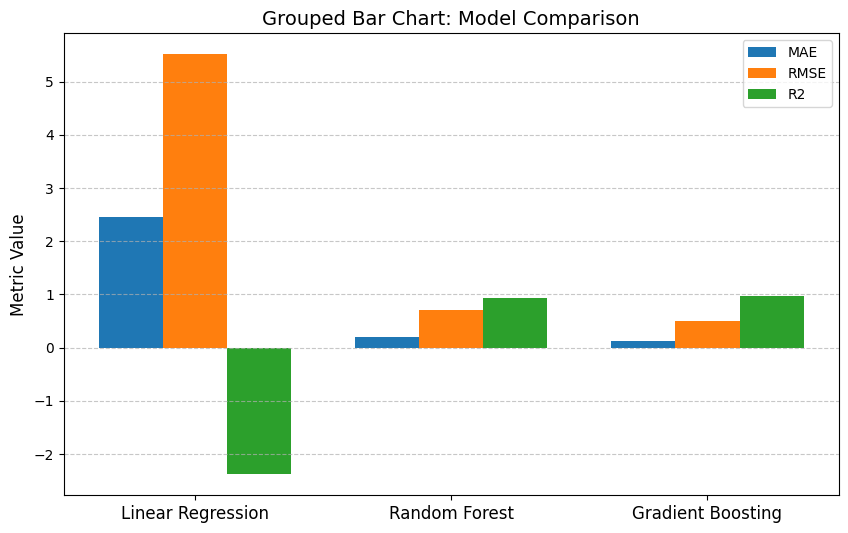

In [ ]:
#visualising the reults of different models

# Metrics and colors
metrics = ['MAE', 'RMSE', 'R2']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

n_models = len(results_df)
x = np.arange(n_models)  # label locations
width = 0.25  # width of each bar

plt.figure(figsize=(10,6))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric, color=colors[i])

# Labels and ticks
plt.xticks(x + width, results_df['Model'], fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Grouped Bar Chart: Model Comparison', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## 🧩 Step 4: Final Model Training and Performance Visualization

After evaluating multiple machine learning models such as **Linear Regression**, **Gradient Boosting**, and **Random Forest**, this step focuses on selecting the best-performing model and analyzing its performance.  
Based on evaluation metrics (**MAE**, **RMSE**, and **R²**), the **Random Forest Regressor** was chosen for its superior accuracy and ability to handle nonlinear relationships.

The model is trained on **completed projects** to learn the relationship between project characteristics and the required number of equipment.

To better understand and validate the results, the following visualizations are generated:
- 📊 **Actual vs. Predicted scatter plots** for completed projects (to assess prediction accuracy).  
- 🏗️ **Project Area vs. Predicted Equipment** charts (using log scale) for ongoing projects (to observe scale patterns and trends).

These visualizations help confirm the model’s reliability and provide insights into how project attributes influence equipment demand.


In [ ]:
#4.1 training the random forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
#4.2  Predict on training set
train_preds = rf_model.predict(X_train)

# Add predictions back to the training dataframe
train_df['pred_cranes'] = np.round(train_preds[:, 0]).astype(int)
train_df['pred_trucks'] = np.round(train_preds[:, 1]).astype(int)
train_df['pred_excavators'] = np.round(train_preds[:, 2]).astype(int)

# Preview a few rows to compare
train_df[['city_clean', 'primary_type', 'sectors', 'area_project',
          'num_cranes', 'pred_cranes',
          'num_trucks', 'pred_trucks',
          'num_excavators', 'pred_excavators']].head(10)

,city_clean,primary_type,sectors,area_project,num_cranes,pred_cranes,num_trucks,pred_trucks,num_excavators,pred_excavators
2,الرياض,تجاري,تجاري,19500.0,2.0,2,6.0,6,2.0,2
26,الرياض,تجاري,تجاري,7759.0,1.0,1,3.0,3,1.0,1
38,الرياض,تجاري,تجاري,10800.0,1.0,1,4.0,4,2.0,2
39,الخبر,تجاري,تجاري,21000.0,2.0,2,6.0,6,2.0,2
40,الجبيل,تجاري,تجاري,15000.0,2.0,2,4.0,4,2.0,2
43,الدمام,تجاري,تجاري,21000.0,2.0,2,6.0,6,2.0,2
45,الرياض,تجاري,تجاري,25570.0,2.0,2,6.0,6,2.0,2
49,جدة,تجاري,تجاري,59970.0,3.0,3,8.0,8,4.0,4
55,بريدة,تجاري,تجاري,64155.0,3.0,3,8.0,8,4.0,4
64,جدة,تجاري,تجاري,14500.0,2.0,2,4.0,4,2.0,2


In [ ]:
#4.3 evaluation on training set
# Compute metrics for each target
metrics = {}
for i, target in enumerate(['num_cranes', 'num_trucks', 'num_excavators']):
    mae = mean_absolute_error(y_train[:, i], train_preds[:, i])
    rmse = np.sqrt(mean_squared_error(y_train[:, i], train_preds[:, i]))
    r2 = r2_score(y_train[:, i], train_preds[:, i])

    metrics[target] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# Display metrics neatly
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                     MAE      RMSE        R2
num_cranes      0.059251  0.185452  0.995460
num_trucks      0.093971  0.299288  0.996234
num_excavators  0.061063  0.253365  0.993869


                        Feature                 Feature_Clean  Importance
0                  area_project                  Project Area    0.814066
32  primary_type_البنية التحتية  Primary Type: Infrastructure    0.125130
51               sectors_ صناعي            Sector: Industrial    0.011379
43               sectors_ تجاري            Sector: Commercial    0.010722
49                sectors_ سكني           Sector: Residential    0.008874
14             city_clean_الليث                 City: Al-Lith    0.006771
3                    wind_speed                    Wind Speed    0.006008
2                      humidity                      Humidity    0.004507
1                          temp                   Temperature    0.003273
40           primary_type_صناعي      Primary Type: Industrial    0.001650


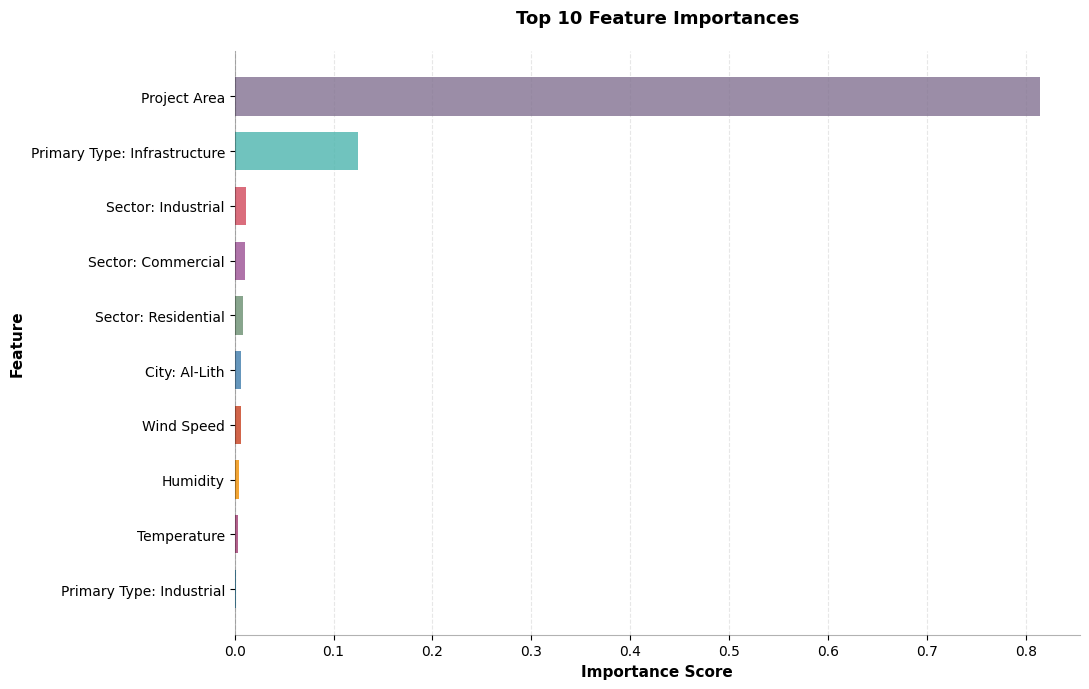

In [ ]:
#4.4  Feature importance analysis to see which features have the most impact on predictions

# Create a mapping dictionary for Arabic to English labels
label_mapping = {
    'area_project': 'Project Area',
    'primary_type_البنية التحتية': 'Primary Type: Infrastructure',
    'sectors_ صناعي': 'Sector: Industrial',
    'sectors_ تجاري': 'Sector: Commercial',
    'sectors_ سكني': 'Sector: Residential',
    'city_clean_الليث': 'City: Al-Lith',
    'wind_speed': 'Wind Speed',
    'humidity': 'Humidity',
    'temp': 'Temperature',
    'primary_type_صناعي': 'Primary Type: Industrial'
}

# Get feature importances
importances = rf_model.feature_importances_
encoded_features = list(numerical_cols) + list(encoder.get_feature_names_out(categorical_cols))

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': encoded_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Map feature names to clean labels
importance_df['Feature_Clean'] = importance_df['Feature'].map(label_mapping)
# Fill any unmapped features with original names
importance_df['Feature_Clean'] = importance_df['Feature_Clean'].fillna(importance_df['Feature'])

# Display top 10
print(importance_df[['Feature', 'Feature_Clean', 'Importance']].head(10))

# Visualize with clean labels and nice styling
plt.figure(figsize=(11, 7))

# Create a nice color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3F7CAC',
          '#6B8F71', '#9B5094', '#D1495B', '#4CB5AE', '#827191']

plt.barh(importance_df['Feature_Clean'][:10][::-1],
         importance_df['Importance'][:10][::-1],
         color=colors,
         alpha=0.8,
         height=0.7)  # Slightly thinner bars

# Styling improvements
plt.xlabel('Importance Score', fontsize=11, fontweight='bold')
plt.ylabel('Feature', fontsize=11, fontweight='bold')
plt.title('Top 10 Feature Importances', fontsize=13, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().set_axisbelow(True)

# Remove spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_alpha(0.3)
plt.gca().spines['bottom'].set_alpha(0.3)

# Adjust layout
plt.tight_layout()
plt.show()


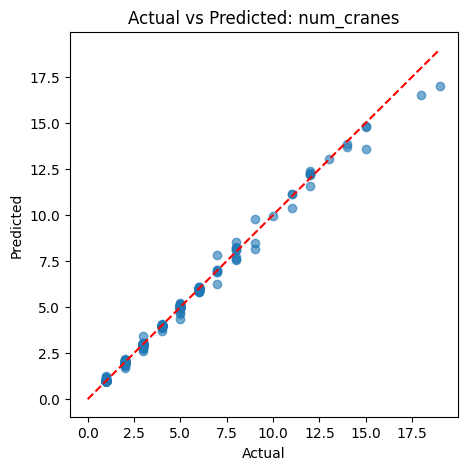

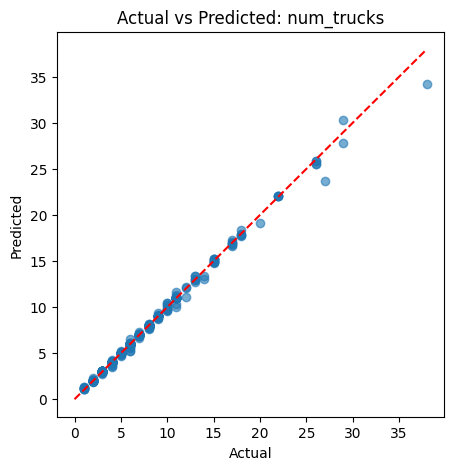

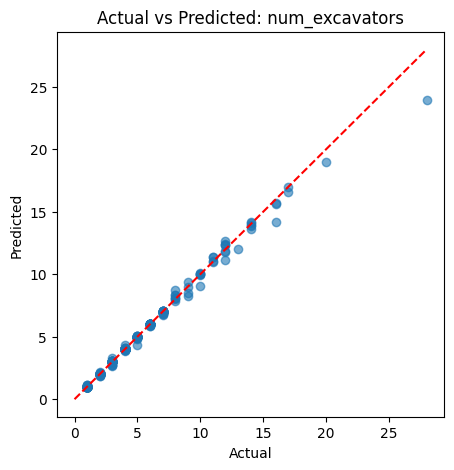

In [ ]:
#4.5  Actual vs Predicted Visualization
for i, target in enumerate(['num_cranes', 'num_trucks', 'num_excavators']):
    plt.figure(figsize=(5,5))
    plt.scatter(y_train[:, i], train_preds[:, i], alpha=0.6)
    plt.plot([0, max(y_train[:, i])], [0, max(y_train[:, i])], 'r--')
    plt.title(f"Actual vs Predicted: {target}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

In [ ]:
#4.6 predictions on ongoing projects

predict_targets = rf_model.predict(X_pred)

# Adding predictions back to the dataframe
predict_df['pred_cranes'] = np.round(predict_targets[:, 0]).astype(int)
predict_df['pred_trucks'] = np.round(predict_targets[:, 1]).astype(int)
predict_df['pred_excavators'] = np.round(predict_targets[:, 2]).astype(int)

# Preview
predict_df[['city_clean', 'primary_type', 'sectors', 'area_project',
            'pred_cranes', 'pred_trucks', 'pred_excavators']].head(10)


,city_clean,primary_type,sectors,area_project,pred_cranes,pred_trucks,pred_excavators
0,الدمام,تجاري,تجاري,7752.0,1,3,1
1,الرياض,تجاري,تجاري,8000.0,1,3,1
3,جدة,فندقي,تجاري,3651.0,1,3,1
4,الطائف,فندقي,تجاري,15252.0,2,4,2
5,الرياض,تجاري,تجاري,17344.0,2,5,2
6,أبها,تجاري,تجاري,5400.0,1,3,1
7,الدمام,تجاري,تجاري,4744.0,1,3,1
8,نجران,فندقي,تجاري,5000.0,1,3,1
9,مكة المكرمة,تجاري,تجاري,20000.0,2,6,2
10,الدمام,تجاري,تجاري,12000.0,1,4,2


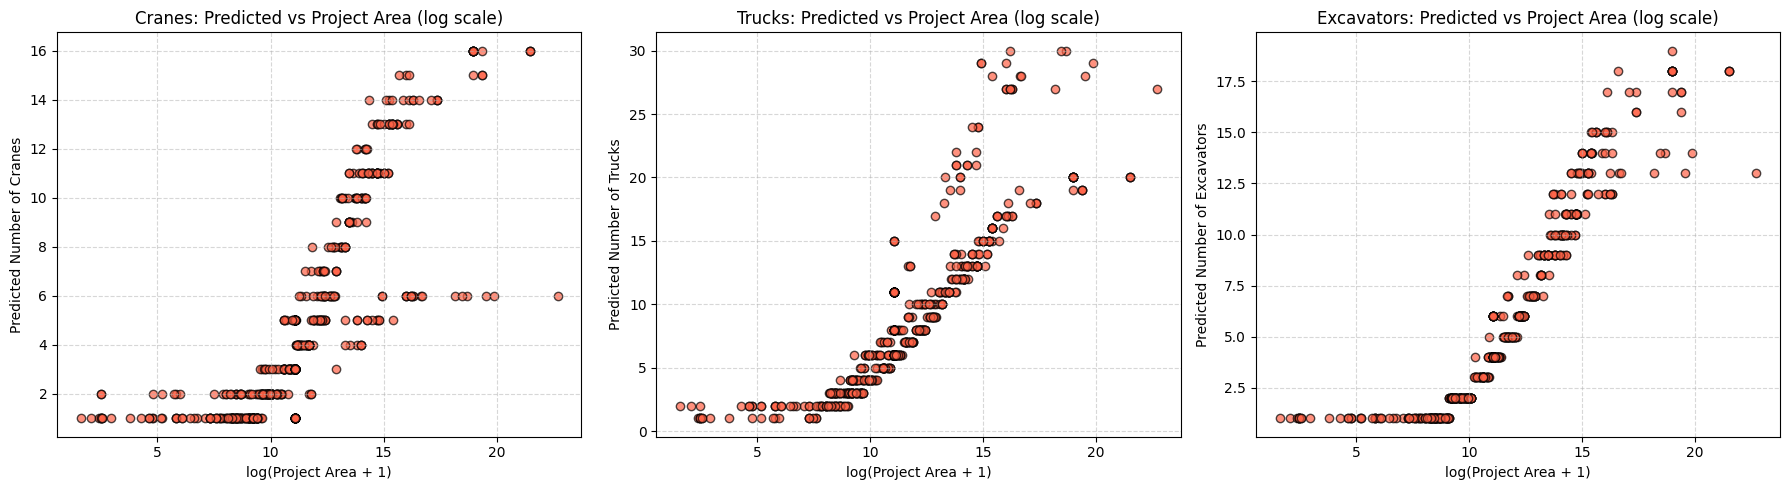

In [ ]:
#4.7 Project Area vs Predicted Equipment Visualization
# -----------------------------------------------------
# (Trend analysis between area and equipment)

plt.figure(figsize=(18, 5))

equipment = [
    ('pred_cranes', 'Cranes'),
    ('pred_trucks', 'Trucks'),
    ('pred_excavators', 'Excavators')
]

for i, (pred_col, label) in enumerate(equipment, 1):
    plt.subplot(1, 3, i)
    plt.scatter(
        np.log1p(predict_df['area_project']),  # log scale for better spacing
        predict_df[pred_col],
        color='tomato', alpha=0.7, edgecolor='k'
    )
    plt.title(f'{label}: Predicted vs Project Area (log scale)', fontsize=12)
    plt.xlabel('log(Project Area + 1)', fontsize=10)
    plt.ylabel(f'Predicted Number of {label}', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()




## 🧠 Step 5: Interactive Prediction Using User Input

Now that the model has been trained and evaluated, this step adds an **interactive interface** to make real-time predictions based on user-provided project details.  

By using **interactive widgets**, the user can input project information such as:
- 🏗️ Project area  
- 🏙️ City  
- 🏢 Project type and sector  
- 🌡️ Environmental conditions (temperature, humidity, wind speed)

Once the user fills in these details and clicks the **"Predict Equipment"** button, the trained **Random Forest model** generates predictions for the number of **cranes, trucks, and excavators** required.  
An adjustment function is then applied to fine-tune these predictions based on environmental factors, and the results are displayed neatly in a table showing both **raw** and **adjusted** equipment counts.

This step makes the model practical and user-friendly, allowing project planners or engineers to quickly estimate equipment requirements for new or ongoing construction projects.


In [ ]:
# 🧠 Step 5: Interactive Prediction Using User Input
# Styled dynamic prediction output inside Google Colab

# --- Widgets for user input ---
area_widget = widgets.FloatText(description="Area (m²):", value=5000)
city_widget = widgets.Dropdown(description="City:", options=sorted(df['city_clean'].unique()))
type_widget = widgets.Dropdown(description="Type:", options=sorted(df['primary_type'].unique()))
sector_widget = widgets.Dropdown(description="Sector:", options=sorted(df['sectors'].unique()))
temp_widget = widgets.FloatText(description="Temp (°C):", value=35)
humidity_widget = widgets.FloatText(description="Humidity (%):", value=40)
wind_widget = widgets.FloatText(description="Wind speed (m/s):", value=5)

predict_button = widgets.Button(description="Predict Equipment", button_style="success")
output = widgets.Output()

# --- VALID SECTOR MAPPING ---
valid_sectors = {
    "تجاري": ["تجاري", "ترفيهي/سياحي", "سكني"],
    "فندقي": ["ترفيهي/سياحي", "تجاري"],
    "البنية التحتية": ["حكومي", "صناعي", "تجاري"],
    "ترفيهي/سياحي": ["ترفيهي/سياحي", "تجاري", "رياضي"],
    "تعليمي": ["تعليمي", "حكومي"],
    "حكومي": ["حكومي"],
    "ديني/خيري": ["ديني/خيري"],
    "رياضي": ["رياضي", "ترفيهي/سياحي"],
    "سكني": ["سكني", "تجاري"],
    "علمي": ["علمي", "تعليمي"],
    "صناعي": ["صناعي", "تجاري"],
    "صحي": ["صحي", "حكومي", "تجاري"]
}

# --- UI update logic ---
def update_sector(change):
    selected_type = type_widget.value
    if selected_type in valid_sectors:
        sector_widget.options = valid_sectors[selected_type]
    else:
        sector_widget.options = []

# Connect listener: when Type changes -> update Sector
type_widget.observe(update_sector, names='value')

# Display input fields
display(area_widget, city_widget, type_widget, sector_widget,
        temp_widget, humidity_widget, wind_widget,
        predict_button, output)


# --- Adjustment function with flags & change detection ---
def adjust_equipment_user_input(row):
    raw_cranes = int(row['num_cranes'])
    raw_trucks = int(row['num_trucks'])
    raw_excavators = int(row['num_excavators'])

    cranes = raw_cranes
    trucks = raw_trucks
    excavators = raw_excavators

    heat_flag = False
    wind_flag = False
    changed = False

    # Rule 1: High wind → reduce cranes
    if row['wind_speed'] > 10:
        wind_flag = True
        new_cranes = round(cranes * 0.9)
        if new_cranes != cranes:
            changed = True
        cranes = new_cranes

    # Rule 2: Extreme heat or humidity → increase equipment
    if row['temp'] > 37 or row['humidity'] > 50:
        heat_flag = True
        new_cranes = round(cranes * 1.2)
        new_trucks = round(trucks * 1.2)
        new_excavators = round(excavators * 1.2)

        if (new_cranes != cranes) or (new_trucks != trucks) or (new_excavators != excavators):
            changed = True

        cranes = new_cranes
        trucks = new_trucks
        excavators = new_excavators

    return pd.Series([cranes, trucks, excavators, changed, heat_flag, wind_flag])


# --- Prediction function ---
def predict_user_project(b):
    with output:
        clear_output()

        # Create user input row as DF
        user_row = pd.DataFrame([{
            'area_project': area_widget.value,
            'city_clean': city_widget.value,
            'primary_type': type_widget.value,
            'sectors': sector_widget.value,
            'temp': temp_widget.value,
            'humidity': humidity_widget.value,
            'wind_speed': wind_widget.value,
            'rainfall': 0
        }])

        # Encode categorical columns
        X_user_cat = encoder.transform(user_row[categorical_cols])
        X_user = np.hstack([user_row[numerical_cols].values, X_user_cat])

        # Raw model predictions
        pred = rf_model.predict(X_user)
        pred_cranes, pred_trucks, pred_excavators = pred[0]

        # Adjusted values
        adjusted = adjust_equipment_user_input(pd.Series({
            'num_cranes': pred_cranes,
            'num_trucks': pred_trucks,
            'num_excavators': pred_excavators,
            'temp': temp_widget.value,
            'humidity': humidity_widget.value,
            'wind_speed': wind_widget.value
        }))

        adj_cranes = int(adjusted[0])
        adj_trucks = int(adjusted[1])
        adj_excavators = int(adjusted[2])
        changed = adjusted[3]
        heat_flag = adjusted[4]
        wind_flag = adjusted[5]

        # --- Message logic ---
        message_parts = []

        # both conditions
        if heat_flag and wind_flag:
            if changed:
                message_parts.append("⚠️ Hot/humid and high wind detected — equipment adjusted for safety.")
            else:
                message_parts.append("⚠️ Harsh conditions detected — minimal project scale, no significant adjustment needed.")

        # only heat
        elif heat_flag:
            if changed:
                message_parts.append("🔥 Hot or humid conditions — equipment increased to handle reduced productivity.")
            else:
                message_parts.append("🌡 Hot conditions detected — small-scale project, no change needed.")

        # only wind
        elif wind_flag:
            if changed:
                message_parts.append("💨 High wind detected — cranes reduced to ensure safe operations.")
            else:
                message_parts.append("💨 High wind detected — minimal requirements, no adjustment needed.")

        # no weather risks
        else:
            message_parts.append("✅ Normal conditions — standard predictions applied.")

        message = "<br>".join(message_parts)

        # --- Card output block ---
        display(HTML("<div style='height:25px;'></div>"))

        display(HTML(f"""
        <div style="
            background-color:#ffffff;
            border-radius:12px;
            font-family:Arial, sans-serif;
            width:70%;
            margin:10px 0;
            box-shadow:0 2px 10px rgba(0,0,0,0.25);
            color:#222222;
        ">
          <div style="
              background-color:#A2E8F2;
              color:#00695c;
              padding:10px 16px;
              border-radius:12px 12px 0 0;
              font-size:17px;
              font-weight:bold;
          ">
            🔍 Predicted Equipment for Your Project
          </div>

          <div style="padding:14px 18px; font-size:15px;">
            <p style="margin:4px 0;"><b>🪜 Cranes:</b> {adj_cranes}</p>
            <p style="margin:4px 0;"><b>🚚 Trucks:</b> {adj_trucks}</p>
            <p style="margin:4px 0;"><b>⛏️ Excavators:</b> {adj_excavators}</p>

            <hr style="border:none; border-top:1px solid #ddd; margin:10px 0;">

            <p style="font-size:13px; color:#00695c; margin:0;">
              {message}
            </p>
          </div>
        </div>
        """))

        display(HTML("<div style='height:15px;'></div>"))

        display(HTML("<p style='font-size:18px; margin:6px 0 10px 0; color:#00695c;'><b>📌 The table below shows the raw model predictions and the adjusted equipment counts based on weather conditions.</b></p>"))

        results = pd.DataFrame([{
            'Raw Cranes': int(pred_cranes),
            'Raw Trucks': int(pred_trucks),
            'Raw Excavators': int(pred_excavators),
            'Adjusted Cranes': adj_cranes,
            'Adjusted Trucks': adj_trucks,
            'Adjusted Excavators': adj_excavators
        }])

        # Styled table
        display(results.style.set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e0f7fa'), ('color', '#00695c'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ]))


# Connect button
predict_button.on_click(predict_user_project)


FloatText(value=5000.0, description='Area (m²):')

Dropdown(description='City:', options=('أبها', 'أملج', 'الأحساء', 'الباحة', 'البكيرية', 'الجبيل', 'الخبر', 'ال…

Dropdown(description='Type:', options=('البنية التحتية', 'تجاري', 'ترفيهي/سياحي', 'تعليمي', 'حكومي', 'ديني/خير…

Dropdown(description='Sector:', options=(' تجاري', ' ترفيهي/سياحي', ' تعليمي', ' حكومي', ' ديني/خيري', ' رياضي…

FloatText(value=35.0, description='Temp (°C):')

FloatText(value=40.0, description='Humidity (%):')

FloatText(value=5.0, description='Wind speed (m/s):')

Button(button_style='success', description='Predict Equipment', style=ButtonStyle())

Output()